# Previsão do preço das ações

# Importando as bibliotecas

In [1]:
import pandas as pd

# Seleciona os recursos de acordo com as K pontuações com base em uma func estatistica mais altas
# Isso melhora o desempenho do modelo e reduz a comlpexidade computacional
from sklearn.feature_selection import SelectKBest

# Otimização de hiperparâmetros(como profundidade de uma árvore de decisão) para produzir melhor resultado no modelo
from sklearn.model_selection import GridSearchCV

# Modelo que usa redes neurais artificais para realizar a tarefa de regressao
# Cria modelos comlpexos capazes de capturar relações não lineares nos dados para previsão de valores numericos
from sklearn.neural_network import MLPRegressor

# Normaliza os dados, garantindo que todas variaveis sejam tratadas da mesma forma em um modelo de aprendizado
# Evita dominancia de variaveis no aprendizado do modelo e facilita a convergencia de algoritmos de otimização
from sklearn.preprocessing import MinMaxScaler

# datasets: módulo que fornece datasets pre carregados, facilita experimentos e aprendizado
# linear_model: contem modelos lineares, como o linear regression para ser usados como baseline
from sklearn import datasets, linear_model

# mean_squared_error e r2: métricas para avaliação de modelos de regressão
# mean_squared_error: mede o erro absoluto médio das previsões
# r2: mede o quão bem o modelo se ajusta aos dados
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Essa é uma classe do modulo utilizada para normalizar os dados
from sklearn.preprocessing import StandardScaler 

# A classe Pipeline do modulo é usada para encadear multiplos passos de processamento e modelagem
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
%matplotlib inline

## Carregando o dataset

In [2]:
df = pd.read_csv("./all_bovespa.csv")

In [3]:
df

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios
0,2009-01-02,ABCB4,ABC BRASIL,5.05,5.30,4.95,5.30,241000.0,1.228496e+08
1,2009-01-02,ABNB3,ABNOTE,10.77,10.99,10.76,10.90,7500.0,8.168000e+06
2,2009-01-02,ABYA3,ABYARA,1.55,1.64,1.53,1.61,109800.0,1.757500e+07
3,2009-01-02,ACGU3,GUARANI,2.10,2.19,2.10,2.19,27100.0,5.821600e+06
4,2009-01-02,AEDU11,ANHANGUERA,12.11,12.51,12.00,12.49,211500.0,2.619199e+08
...,...,...,...,...,...,...,...,...,...
1545682,2024-09-06,CSAN3,COSAN,13.38,13.43,12.89,12.89,7391300.0,9.663700e+09
1545683,2024-09-06,ELMD3,ELETROMIDIA,18.06,18.10,17.62,18.10,75700.0,1.350700e+08
1545684,2024-09-06,EMAE4,EMAE,39.97,40.70,39.77,39.77,4500.0,1.805580e+07
1545685,2024-09-06,EMBR3,EMBRAER,49.90,50.10,46.51,47.83,12306000.0,5.896760e+10


In [4]:
#BRADESCO
df_bradesco = df[df['sigla_acao'] == 'BBDC3']

In [5]:
df_bradesco

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios
22,2009-01-02,BBDC3,BRADESCO,20.00,21.10,19.60,21.10,180900.0,3.698934e+08
321,2009-01-05,BBDC3,BRADESCO,20.98,21.54,20.69,20.94,93300.0,1.967057e+08
650,2009-01-06,BBDC3,BRADESCO,21.00,21.54,20.95,21.30,69000.0,1.457220e+08
981,2009-01-07,BBDC3,BRADESCO,21.00,21.30,20.67,20.99,33800.0,7.065950e+07
1314,2009-01-08,BBDC3,BRADESCO,21.00,21.15,20.50,21.15,259000.0,5.415748e+08
...,...,...,...,...,...,...,...,...,...
1544224,2024-09-02,BBDC3,BRADESCO,14.03,14.09,13.97,14.02,2879800.0,4.038933e+09
1544626,2024-09-03,BBDC3,BRADESCO,14.04,14.24,14.01,14.21,5143100.0,7.283326e+09
1544902,2024-09-04,BBDC3,BRADESCO,14.25,14.50,14.21,14.29,5214100.0,7.487933e+09
1545268,2024-09-05,BBDC3,BRADESCO,14.29,14.48,14.26,14.38,3444200.0,4.952900e+09


## Verficando o tipo dos dados

In [6]:
df_bradesco.dtypes

data_pregao          object
sigla_acao           object
nome_acao            object
preco_abertura      float64
preco_maximo        float64
preco_minimo        float64
preco_fechamento    float64
qtd_negocios        float64
volume_negocios     float64
dtype: object

## Alterando campo de data

In [7]:
df_bradesco['data_pregao'] = pd.to_datetime(df_bradesco['data_pregao'], format = '%Y-%m-%d')

C:\Users\joaov\AppData\Local\Temp\ipykernel_13780\972754640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bradesco['data_pregao'] = pd.to_datetime(df_bradesco['data_pregao'], format = '%Y-%m-%d')


In [8]:
df_bradesco.dtypes

data_pregao         datetime64[ns]
sigla_acao                  object
nome_acao                   object
preco_abertura             float64
preco_maximo               float64
preco_minimo               float64
preco_fechamento           float64
qtd_negocios               float64
volume_negocios            float64
dtype: object

## Criando novos campos de médias móveis

In [9]:
df_bradesco.loc[:,'mm5d'] = df_bradesco['preco_fechamento'].rolling(5).mean()
df_bradesco.loc[:,'mm21d'] = df_bradesco['preco_fechamento'].rolling(21).mean()

C:\Users\joaov\AppData\Local\Temp\ipykernel_13780\1716317297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bradesco.loc[:,'mm5d'] = df_bradesco['preco_fechamento'].rolling(5).mean()
C:\Users\joaov\AppData\Local\Temp\ipykernel_13780\1716317297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bradesco.loc[:,'mm21d'] = df_bradesco['preco_fechamento'].rolling(21).mean()


In [10]:
df_bradesco

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios,mm5d,mm21d
22,2009-01-02,BBDC3,BRADESCO,20.00,21.10,19.60,21.10,180900.0,3.698934e+08,NaN,NaN
321,2009-01-05,BBDC3,BRADESCO,20.98,21.54,20.69,20.94,93300.0,1.967057e+08,NaN,NaN
650,2009-01-06,BBDC3,BRADESCO,21.00,21.54,20.95,21.30,69000.0,1.457220e+08,NaN,NaN
981,2009-01-07,BBDC3,BRADESCO,21.00,21.30,20.67,20.99,33800.0,7.065950e+07,NaN,NaN
1314,2009-01-08,BBDC3,BRADESCO,21.00,21.15,20.50,21.15,259000.0,5.415748e+08,21.096,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1544224,2024-09-02,BBDC3,BRADESCO,14.03,14.09,13.97,14.02,2879800.0,4.038933e+09,14.084,13.579048
1544626,2024-09-03,BBDC3,BRADESCO,14.04,14.24,14.01,14.21,5143100.0,7.283326e+09,14.128,13.671429
1544902,2024-09-04,BBDC3,BRADESCO,14.25,14.50,14.21,14.29,5214100.0,7.487933e+09,14.152,13.747619
1545268,2024-09-05,BBDC3,BRADESCO,14.29,14.48,14.26,14.38,3444200.0,4.952900e+09,14.208,13.829524


## Ajustando para 1 dia a frente

In [11]:
# Prevendo o valor da ação para o dia seguinte

df_bradesco.loc[:,'preco_fechamento'] = df_bradesco['preco_fechamento'].shift(-1)
df_bradesco.dropna(inplace=True)
df_bradesco

C:\Users\joaov\AppData\Local\Temp\ipykernel_13780\3583233017.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bradesco.dropna(inplace=True)


,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios,mm5d,mm21d
6292,2009-01-30,BBDC3,BRADESCO,18.20,18.37,17.97,17.89,49300.0,8.924360e+07,18.288,19.262381
6617,2009-02-02,BBDC3,BRADESCO,18.19,18.19,17.51,17.83,40800.0,7.212550e+07,18.216,19.109524
6923,2009-02-03,BBDC3,BRADESCO,17.90,17.90,17.35,18.07,115100.0,2.027093e+08,18.146,18.961429
7232,2009-02-04,BBDC3,BRADESCO,17.90,18.30,17.74,18.61,54700.0,9.851760e+07,18.038,18.807619
7551,2009-02-05,BBDC3,BRADESCO,18.00,18.80,17.78,18.91,99800.0,1.834868e+08,18.120,18.694286
...,...,...,...,...,...,...,...,...,...,...,...
1543939,2024-08-30,BBDC3,BRADESCO,13.98,14.15,13.98,14.02,10668200.0,1.506262e+10,14.106,13.450952
1544224,2024-09-02,BBDC3,BRADESCO,14.03,14.09,13.97,14.21,2879800.0,4.038933e+09,14.084,13.579048
1544626,2024-09-03,BBDC3,BRADESCO,14.04,14.24,14.01,14.29,5143100.0,7.283326e+09,14.128,13.671429
1544902,2024-09-04,BBDC3,BRADESCO,14.25,14.50,14.21,14.38,5214100.0,7.487933e+09,14.152,13.747619


## Verificando quantidade de linhas

In [12]:
qtd_linhas = len(df_bradesco)
qtd_linhas_treino = qtd_linhas - 700
qtd_linhas_teste = qtd_linhas -15

qtd_linhas_validacao = qtd_linhas_treino - qtd_linhas_teste

info =(
    f"linhas de treino = 0: {qtd_linhas_treino} " 
    f"linhas teste = {qtd_linhas_treino}:{qtd_linhas_teste} "
    f"linhas validacoes= {qtd_linhas_teste}:{qtd_linhas} "
)

info

'linhas de treino = 0: 3165 linhas teste = 3165:3850 linhas validacoes= 3850:3865 '

## Reidexando o dataset

In [13]:
df_bradesco = df_bradesco.reset_index(drop=True)
df_bradesco

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios,mm5d,mm21d
0,2009-01-30,BBDC3,BRADESCO,18.20,18.37,17.97,17.89,49300.0,8.924360e+07,18.288,19.262381
1,2009-02-02,BBDC3,BRADESCO,18.19,18.19,17.51,17.83,40800.0,7.212550e+07,18.216,19.109524
2,2009-02-03,BBDC3,BRADESCO,17.90,17.90,17.35,18.07,115100.0,2.027093e+08,18.146,18.961429
3,2009-02-04,BBDC3,BRADESCO,17.90,18.30,17.74,18.61,54700.0,9.851760e+07,18.038,18.807619
4,2009-02-05,BBDC3,BRADESCO,18.00,18.80,17.78,18.91,99800.0,1.834868e+08,18.120,18.694286
...,...,...,...,...,...,...,...,...,...,...,...
3860,2024-08-30,BBDC3,BRADESCO,13.98,14.15,13.98,14.02,10668200.0,1.506262e+10,14.106,13.450952
3861,2024-09-02,BBDC3,BRADESCO,14.03,14.09,13.97,14.21,2879800.0,4.038933e+09,14.084,13.579048
3862,2024-09-03,BBDC3,BRADESCO,14.04,14.24,14.01,14.29,5143100.0,7.283326e+09,14.128,13.671429
3863,2024-09-04,BBDC3,BRADESCO,14.25,14.50,14.21,14.38,5214100.0,7.487933e+09,14.152,13.747619


## Separando as features e labels

In [14]:
features = df_bradesco.drop(["sigla_acao","nome_acao","data_pregao","preco_fechamento"], axis=1)
labels = df_bradesco["preco_fechamento"]

## Escolhendo as melhores features com Kbest

In [15]:
features_list = ('preco_abertura','qtd_negocios','volume_negocios','mmd5d','mm21d')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print('')
print("Melhores features: ")
print(k_best_features_final)


Melhores features: 
{'volume_negocios': 181.82010017326988, 'mmd5d': 179.96286624004577, 'qtd_negocios': 149.09922161481103, 'mm21d': 2.6609238022452453}


## Separando as features 

In [16]:
features = df_bradesco.drop(['sigla_acao','nome_acao','data_pregao','preco_fechamento','preco_abertura','mm21d'], axis= 1)

## Normalizando os dados de entrada(features)

In [17]:
# gerando um novo padrão
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print('Features: ', features_scale.shape)
print(features_scale) # normalizando os dados de entrada(fetures)

Features:  (3865, 5)
[[2.38781526e-01 2.38896366e-01 5.71805360e-04 2.87025414e-04
  2.44761905e-01]
 [2.32885686e-01 2.23418573e-01 4.25849037e-04 1.95238944e-04
  2.42312925e-01]
 [2.23386833e-01 2.18034993e-01 1.70167901e-03 8.95423313e-04
  2.39931973e-01]
 ...
 [1.03504749e-01 1.05652759e-01 8.80391369e-02 3.88613639e-02
  1.03265306e-01]
 [1.12020963e-01 1.12382234e-01 8.92583015e-02 3.99584615e-02
  1.04081633e-01]
 [1.11365870e-01 1.14064603e-01 5.88667608e-02 2.63657267e-02
  1.05986395e-01]]


## Separando dados de treino, teste e validação 

In [18]:
X_train = features_scale[:qtd_linhas_treino]
X_test = features_scale[qtd_linhas_treino:qtd_linhas_teste]

y_train = labels[:qtd_linhas_treino]
y_test = labels[qtd_linhas_treino:qtd_linhas_teste]

print(len(X_train), len(y_train))

print(len(X_test), len(y_test))

3165 3165
685 685


## Escolhendo os melhores modelos

#### Regressão linear

In [19]:
lr = linear_model.LinearRegression() # instanciando a funcao
lr.fit(X_train, y_train) # treinando
pred = lr.predict(X_test) 
cd = r2_score(y_test,pred) # o quao proximo os dados estao prox da linha de regressao

f"Coeficiente de determinação: {cd * 100:.2f}"

'Coeficiente de determinação: 74.87'

#### Rede Neural

In [20]:
rn = MLPRegressor(max_iter=2000)

rn.fit(X_train, y_train)
pred = rn.predict(X_test)

cd = rn.score(X_test, y_test)

f"Coeficiente de determinação: {cd * 100:.2f}"

'Coeficiente de determinação: 78.37'

#### Rede Neural com ajuste hyper parameters

In [21]:
rn = MLPRegressor(max_iter=2000) # instanciando módulo

# normaliza os dados de entrada
scaler = StandardScaler()

# definição do pipeline para escalonamento e treinamento permitindo o escalonamento de forma integrada
pipeline = Pipeline([
    ('scaler',scaler),
    ('mlp', rn)
])

# ajustando espaço de busca de hiperparâmetros
parameter_scape = {
    'mlp__hidden_layer_sizes':[(i,)for i in list(range(1,21))], # numero de neuronios na camada oculta
    'mlp__activation': ['tanh','relu'], # funcões de ativação (hiperbolica tangente,)
    'mlp__solver':['sgd','adam','lbfgs'],
    'mlp__alpha': [0.0001,0.05], #regularização L2
    'mlp__learning_rate': ['constant', 'adaptive'] # taxa de aprendizado que pode ser constante ou adaptativa
}

# faz uma busca exaustiva nos hiperparametros definidos em parameter_scape
search = GridSearchCV(pipeline, parameter_scape, n_jobs=-1, cv=5)

search.fit(X_train,y_train) # treinando o modelo
clf = search.best_estimator_ # armazena o modelo com os melhores hiperparametros
pred = search.predict(X_test) # realizando predição no conjunto de testes

# Aplicando métricas para ver o desempenho do modelo
cd = search.score(X_test, y_test) # retornando coeficiente de determinação
mae = mean_absolute_error(y_test,pred) # erro absoluto médio
mse = mean_squared_error(y_test, pred) # erro quadrático médio

print(f"Coeficiente de determinação: {cd *100:.2f}")
print(f"Coeficiente de determinação: {mae:.4f}")
print(f"Coeficiente de determinação: {mse:.4f}")

Coeficiente de determinação: 73.21
Coeficiente de determinação: 0.6073
Coeficiente de determinação: 1.1390


## Executando a previsão

In [28]:
previsao = features_scale[qtd_linhas_teste:qtd_linhas]

data_pregao_full = df_bradesco['data_pregao']
data_pregao = data_pregao_full[qtd_linhas_teste:qtd_linhas]

res_full = df_bradesco['preco_fechamento']
res = res_full[qtd_linhas_teste:qtd_linhas]

pred = lr.predict(previsao)
df = pd.DataFrame({"data_pregao":data_pregao, "real":res, "previsao":pred})
df["real"] = df["real"].shift(+1)

df.set_index("data_pregao", inplace=True)
print(df)

              real   previsao
data_pregao                  
2024-08-16     NaN  13.535563
2024-08-19   14.09  13.673281
2024-08-20   14.06  14.015949
2024-08-21   14.04  14.112747
2024-08-22   14.03  14.083560
2024-08-23   14.20  14.225228
2024-08-26   14.13  14.227088
2024-08-27   13.99  14.110795
2024-08-28   14.17  14.099255
2024-08-29   14.10  14.173505
2024-08-30   14.14  14.077137
2024-09-02   14.02  14.168790
2024-09-03   14.21  14.221894
2024-09-04   14.29  14.431849
2024-09-05   14.38  14.478675


## Visualizando em um gráfico 

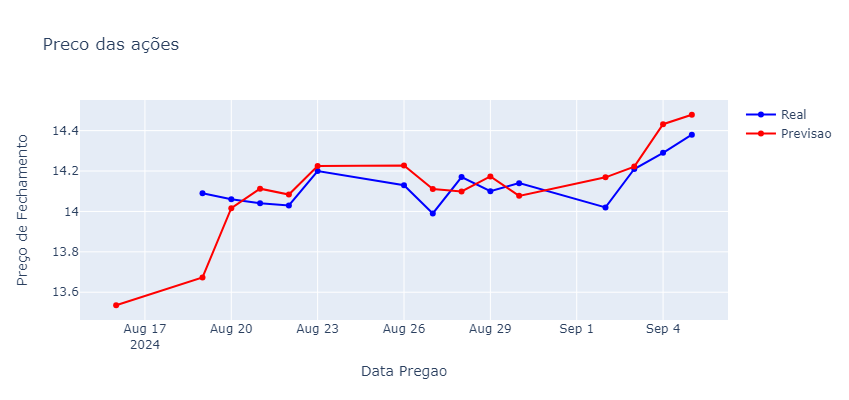

In [43]:
import plotly.graph_objects as go

# criando figura
fig = go.Figure()
fig

# adicionando a linha para os valores reais
fig.add_trace(go.Scatter(x=df.index, y=df["real"],mode="lines+markers",
                        name="Real", line=dict(color="blue"), marker=dict(symbol="circle")))

# adicionando linha para a previsao
fig.add_trace(go.Scatter(x=df.index, y=df["previsao"],mode="lines+markers",
                         name="Previsao", line=dict(color="red"), marker=dict(symbol="circle")))


# adicionando titulos e rotulos
fig.update_layout(title="Preco das ações",
                  xaxis_title= "Data Pregao",
                  yaxis_title="Preço de Fechamento",
                  autosize=False, width=800, height=400)